In [1]:
%pip install mplfinance matplotlib langgraph pydot

import yfinance as yf
import mplfinance as mpf
import pandas as pd
from IPython.display import Image, display


   -------------------- ------------------- 1/2 [mplfinance]
   ---------------------------------------- 2/2 [mplfinance]

Note: you may need to restart the kernel to use updated packages.


📊 Generating Chart for RELIANCE.NS...
✅ Chart saved as RELIANCE.NS_chart.png


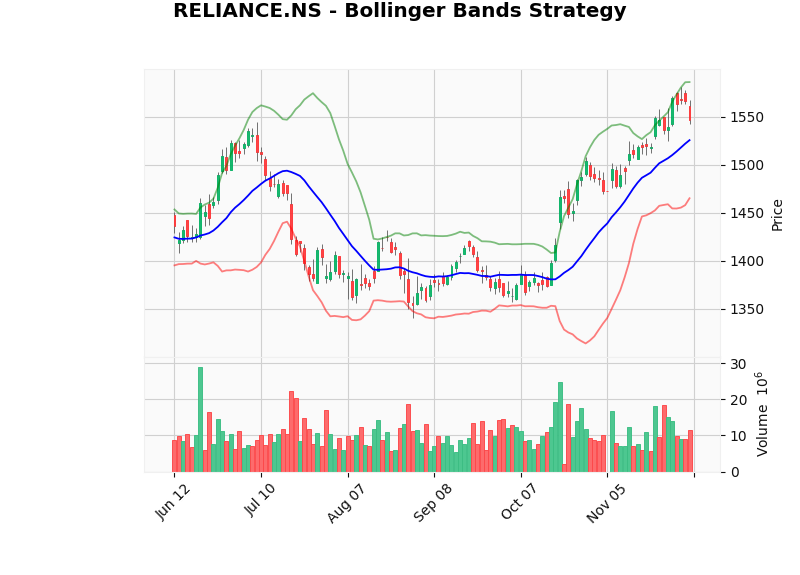

In [3]:

def plot_technical_analysis(ticker: str):
    print(f"📊 Generating Chart for {ticker}...")
    
    # 1. Fetch Data (Same logic as Quant Agent)
    stock = yf.Ticker(ticker)
    df = stock.history(period="1y")
    
    if df.empty:
        print("❌ No data found.")
        return None
    
    # 2. Calculate Indicators on the FULL Data first (to get accurate averages)
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['STD_20'] = df['Close'].rolling(window=20).std()
    df['BB_Upper'] = df['SMA_20'] + (df['STD_20'] * 2)
    df['BB_Lower'] = df['SMA_20'] - (df['STD_20'] * 2)
    
    # 3. Slice the data NOW (Get last 120 days)
    # We do this BEFORE creating the plot objects so shapes match
    subset = df.iloc[-120:] 
    
    # 4. Create Custom Plots using ONLY the SUBSET data
    apds = [
        mpf.make_addplot(subset['BB_Upper'], color='green', alpha=0.5),
        mpf.make_addplot(subset['BB_Lower'], color='red', alpha=0.5),
        mpf.make_addplot(subset['SMA_20'], color='blue')
    ]
    
    # 5. Plot CandleSticks
    filename = f"{ticker}_chart.png"
    
    # We use a try-except block to handle file permission errors if file is open
    try:
        mpf.plot(
            subset, 
            type='candle', 
            style='yahoo', 
            addplot=apds, # Now this matches the subset length perfectly
            title=f"{ticker} - Bollinger Bands Strategy",
            volume=True,
            savefig=filename
        )
        print(f"✅ Chart saved as {filename}")
        return filename
    except Exception as e:
        print(f"Error plotting: {e}")
        return None

# Run the visualization
chart_file = plot_technical_analysis("RELIANCE.NS")

# Display if successful
if chart_file:
    display(Image(filename=chart_file))


🧠 THE HEDGEGRAPH ARCHITECTURE:


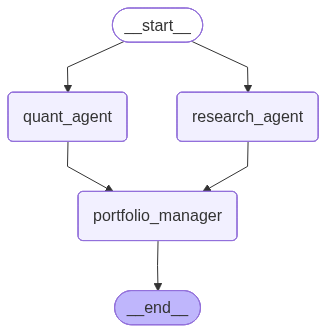

In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated, List
import operator
from langchain_core.messages import BaseMessage

class AgentState(TypedDict):
    ticker: str
    messages: Annotated[List[BaseMessage], operator.add]
    technical_summary: str
    fundamental_summary: str
    final_report: str

# Define dummy nodes just for the visual structure
def dummy_node(state): return state

workflow_viz = StateGraph(AgentState)
workflow_viz.add_node("quant_agent", dummy_node)
workflow_viz.add_node("research_agent", dummy_node)
workflow_viz.add_node("portfolio_manager", dummy_node)

workflow_viz.add_edge(START, "quant_agent")
workflow_viz.add_edge(START, "research_agent")
workflow_viz.add_edge("quant_agent", "portfolio_manager")
workflow_viz.add_edge("research_agent", "portfolio_manager")
workflow_viz.add_edge("portfolio_manager", END)

app_viz = workflow_viz.compile()

print("\n🧠 THE HEDGEGRAPH ARCHITECTURE:")
# This generates a Mermaid Diagram of your AI
display(Image(app_viz.get_graph().draw_mermaid_png()))